In [1]:
# Import all necessity functions for Machine Learning
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

# Download keras
!pip install keras

# Import all necessity functions for Neural Network
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

# Plotting the confusion matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
# Remove all warnings
import warnings
warnings.filterwarnings("ignore")

#####Import the dataset

In [17]:
import keras
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train shape # {} ".format(X_train.shape),'\n')
print("X_test shape  # {} ".format(X_test.shape),'\n')
print("y_train shape # {} ".format(y_train.shape),'\n')
print("y_test shape  # {} ".format(y_test.shape))

X_train shape # (60000, 28, 28)  

X_test shape  # (10000, 28, 28)  

y_train shape # (60000,)  

y_test shape  # (10000,) 


#####Display some of the dataset

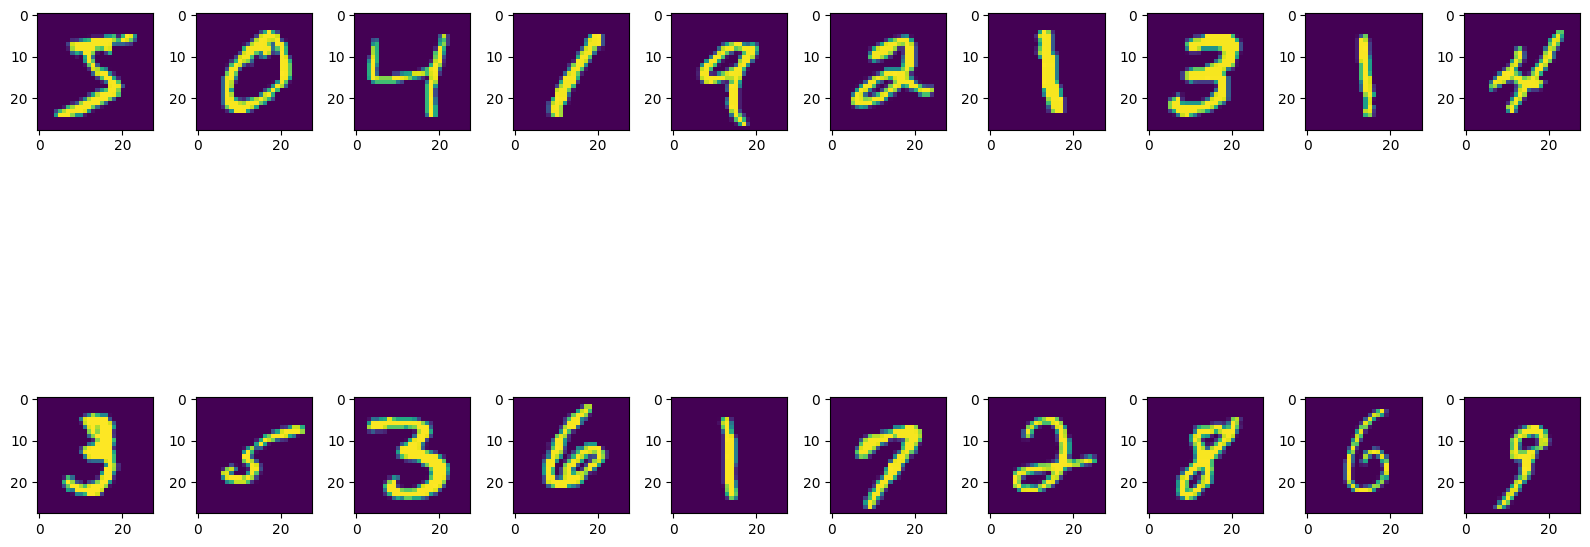

In [18]:
plt.figure(figsize = (16, 10))
for index, data in enumerate(X_train[0:20]):
  plt.subplot(2, 10, index + 1)
  plt.imshow(data)

plt.tight_layout()
plt.show()

#####Do the normalization

In [19]:
X_train = X_train/255
X_test  = X_test/255

print("Normalozation is completed.")

Normalozation is completed.


In [20]:
np.unique(y_test).shape

(10,)

#####Convert the data type into float with respect to PyTorch

In [21]:
import torch

X_train = np.expand_dims(X_train, 1)
X_train = torch.tensor(data = X_train, dtype = torch.float32)
y_train = torch.tensor(data = y_train, dtype = torch.float32)

X_test  = np.expand_dims(X_test, 1)
X_test  = torch.tensor(data = X_test, dtype = torch.float32)
y_test  = torch.tensor(data = y_test, dtype = torch.float32)

#####Initialize the DataLoader with batch_size: 64

In [22]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

In [23]:
BATCH_SIZE = 128
train_loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = BATCH_SIZE, shuffle = True)
test_loader  = DataLoader(dataset = list(zip(X_test, y_test)), batch_size = BATCH_SIZE, shuffle = True)

print("Batch size of Train # {} ".format(train_loader.batch_size),'\n')
print("Batch size of Test  # {} ".format(test_loader.batch_size),'\n')

train_data, train_label = next(iter(train_loader))
test_data, test_label   = next(iter(test_loader))

print("Train data shape with batch_size  # {} ".format(train_data.shape),'\n')
print("Train label shape with batch_size # {} ".format(train_label.shape),'\n')

print("Test data shape with batch_size   # {} ".format(test_data.shape),'\n')
print("Test label shape with batch_size  # {} ".format(test_label.shape))

Batch size of Train # 128  

Batch size of Test  # 128  

Train data shape with batch_size  # torch.Size([128, 1, 28, 28])  

Train label shape with batch_size # torch.Size([128])  

Test data shape with batch_size   # torch.Size([128, 1, 28, 28])  

Test label shape with batch_size  # torch.Size([128]) 


#####Model Building

In [24]:
"""
    Create the class named DigitClassifier that would take TWO parameters
    1. input_channel: Define whether Image is RGB or Gray
    2. output_dimension: Define the class or label that I want to predict
    3. Call the super function that will inherit all functionalities of PyTorch
"""
class DigitClassifier(nn.Module):
  def __init__(self, input_channel = None, output_dimension = None):
    super().__init__()
    """
        Create the First Convolutional Layer with
            1. in_channels: Define the input_channel
            2. out_channels: Define the next neurons with respect to image
            3. kernel_size: Define the kernel/filter that would be placed on top of image
            4. stride: Define how our kernel would be moved
            5. padding: padding 0 means no padding and 1 means padding

        Define the Pooling Layer
            1. MaxPooling: Prevent the overfitting problem

        Define the activation function & Dropout Layer
            1. Activation: ReLU
            2. Dropout: Prevent the overfitting problem

        Input shape: (28 * 28) * 1
    """
    self.conv1 = nn.Conv2d(in_channels = input_channel, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
    self.act1  = nn.ReLU()
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.drop1 = nn.Dropout(p = 0.3)

    """
      Create the Second Convolutional Layer with
          1. in_channels: Define the input_channel
          2. out_channels: Define the next neurons with respect to image
          3. kernel_size: Define the kernel/filter that would be placed on top of image
          4. stride: Define how our kernel would be moved
          5. padding: padding 0 means no padding and 1 means padding

      Define the Pooling Layer with
          MaxPooling: Prevent the overfitting

      Define the activation function & Dropout Layer
          1. Activation: ReLU
          2. Dropout: Prevent the overfitting problem

      Input shape: (14 * 14) * 64
    """
    self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
    self.act2  = nn.ReLU()
    self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.drop2 = nn.Dropout(p = 0.4)

    """
      Do the Flatten operation so that we can perform the classification task and add some neurons with respect to ANN

      Create a fully connected layer that would take
          1. in_features = Input shape: (7 * 7) * 32
          3. out_features = 128
          4. Activation: ReLU
          5. Dropout: rate would be 0.5
    """
    self.flat = nn.Flatten()

    self.hidden1     = nn.Linear(in_features = 7 * 7 * 32, out_features = 128)
    self.activation1 = nn.ReLU()
    self.dropoutLayer= nn.Dropout(p = 0.5)

    """
        Create the second hidden Layer
        1. in_features = 128
        2. out_features = 64
        3. Activation : ReLU
    """
    self.hidden2     = nn.Linear(in_features = 128, out_features = 64)
    self.activation2 = nn.ReLU()

    """
        Create the output layer with
        1. in_features = 64
        2. out_features = output_dimension
    """
    self.outLayer = nn.Linear(in_features = 64, out_features = output_dimension)
    self.outActivation = nn.Softmax()

  def forward(self, x):
    """
        For First Convolutional Layer
    """
    x = self.act1(self.conv1(x))
    x = self.pool1(x)
    x = self.drop1(x)

    """
        For the Second Convolutional Layer
    """
    x = self.act2(self.conv2(x))
    x = self.pool2(x)
    x = self.drop2(x)

    x = self.flat(x)

    """
        For the First Hidden Layer
    """
    x = self.activation1(self.hidden1(x))
    x = self.dropoutLayer(x)

    """
        For the Second Hidden Layer
    """
    x = self.activation2(self.hidden2(x))

    """
        For the output Layer
    """
    if self.outActivation is not None:
      x = self.outActivation(self.outLayer(x))

    else:
      x = self.outLayer(x)

    return x

In [25]:
# Call the model
try:
  model = DigitClassifier(input_channel = 1, output_dimension = 10)
except Exception as e:
  print(e.with_traceback())
else:
  print(model.parameters)

<bound method Module.parameters of DigitClassifier(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.3, inplace=False)
  (conv2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.4, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (hidden1): Linear(in_features=1568, out_features=128, bias=True)
  (activation1): ReLU()
  (dropoutLayer): Dropout(p=0.5, inplace=False)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (activation2): ReLU()
  (outLayer): Linear(in_features=64, out_features=10, bias=True)
  (outActivation): Softmax(dim=None)
)>


In [26]:
summary(model = model, input_size = X_train.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
              ReLU-2           [-1, 64, 28, 28]               0
         MaxPool2d-3           [-1, 64, 14, 14]               0
           Dropout-4           [-1, 64, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]          18,464
              ReLU-6           [-1, 32, 14, 14]               0
         MaxPool2d-7             [-1, 32, 7, 7]               0
           Dropout-8             [-1, 32, 7, 7]               0
           Flatten-9                 [-1, 1568]               0
           Linear-10                  [-1, 128]         200,832
             ReLU-11                  [-1, 128]               0
          Dropout-12                  [-1, 128]               0
           Linear-13                   [-1, 64]           8,256
             ReLU-14                   

#####Define the loss & optimizer

In [27]:
LEARNING_RATE = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adamax(params = model.parameters(), lr = LEARNING_RATE)

#####Train the model

In [28]:
# Initialize some varibales
EPOCHS     = 5
TRAIN_LOSS = []
VAL_LOSS   = []
TRAIN_ACC  = []
VAL_ACC    = []

# Call the model train
model.train()

"""
    1. Run a loop with respect to EPOCHS

    2. Initialize some of the crucial variables
        1. total_train_loss: Define the total train loss with respect to epoch
        2. total_val_loss  : Define the total validation loss with respect to epoch
        3. train_predictions : Define the total train prediction with respect to epoch
        4. val_predictions : Define the total validation predictions with respect to epoch
        5. train_lables : Store all the train labels during batch size
        6. val_labels : Store all the validation labels duirng batch size

    3. Run a loop with respect to train_loader & extrac data and label
"""
#######################
#      Training       #
#######################

for epoch in range(EPOCHS):
  total_train_loss  = []
  total_val_loss    = []
  train_predictions = []
  val_predictions   = []
  train_labels      = []
  val_labels        = []

  for X_batch, y_batch in train_loader:
    y_batch = y_batch.long()
    train_prediction = model(X_batch)
    train_loss = loss_function(train_prediction, y_batch)

    """
        1. Initialize the optimizer to adjust the weight and bias
        2. Do backward propagation with respect to train loss
        3. Do step operation with respect to optimizer
    """

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Store the orginal train labels into train_labels
    train_labels.extend(y_batch.flatten().detach().numpy())

    # Store the train loss into train_loss
    total_train_loss.append(train_loss.item())

    # Store the predicted labels
    train_predictions.extend(torch.argmax(train_prediction, 1).flatten().detach().numpy())

  # ===============================================================================================
  # ===============================================================================================
  """
      Store the train loss and accuracy into TRAIN_LOSS & TRAIN_ACC list after being completed Epoch
  """
  # Store the accuracy into TRAIN_ACCURACY
  TRAIN_ACC.append(accuracy_score(train_labels, train_predictions))

  # Store the train loss into TRAIN_LOSS
  TRAIN_LOSS.append(np.array(total_train_loss).mean())

  ########################
  #        Testing       #
  ########################
  model.eval()

  for val_data, val_label in test_loader:
    val_label = val_label.long()
    val_prediction = model(val_data)
    val_loss = loss_function(val_prediction, val_label)

    # Store the orginal validation labels into val_labels
    val_labels.extend(val_label.flatten().detach().numpy())

    # Store the validation loss into total_val_loss
    total_val_loss.append(val_loss.item())

    # Store the validation prediction labels
    val_predictions.extend(torch.argmax(val_prediction, 1).flatten().detach().numpy())

  # ===============================================================================================
  # ===============================================================================================
  """
      Store the train loss and accuracy into VAL_LOSS & VAL_ACC list after being completed Epoch
  """
  # Store the val loss into VAL_LOSS
  VAL_LOSS.append(np.array(total_val_loss).mean())

  # Store the validation accuracy into VAL_ACC
  VAL_ACC.append(accuracy_score(val_labels, val_predictions))

  ########################
  #       Display        #
  ########################

  print("Epoch {}/{} ".format(epoch + 1, EPOCHS))

  print("{}/{} [=========================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {}".format(train_loader.batch_size,\
                                                                                                             train_loader.batch_size,\
                                                                                                             np.array(total_train_loss).mean(),\
                                                                                                             accuracy_score(train_labels, train_predictions),\
                                                                                                             np.array(total_val_loss).mean(),\
                                                                                                             accuracy_score(val_labels, val_predictions)))

Epoch 1/5 
128/128 [=========================] loss: 1.8165154975614568 - accuracy: 0.6578666666666667 - val_loss: 1.6237392365177976 - val_accuracy: 0.8399
Epoch 2/5 
128/128 [=========================] loss: 1.554246224320011 - accuracy: 0.91185 - val_loss: 1.5168158419524567 - val_accuracy: 0.9476
Epoch 3/5 
128/128 [=========================] loss: 1.5078206001314274 - accuracy: 0.9563 - val_loss: 1.4943692729442934 - val_accuracy: 0.9696
Epoch 4/5 
128/128 [=========================] loss: 1.4941539439056981 - accuracy: 0.9690333333333333 - val_loss: 1.4890126668954198 - val_accuracy: 0.9736
Epoch 5/5 
128/128 [=========================] loss: 1.4874893475188884 - accuracy: 0.9757833333333333 - val_loss: 1.4843668168104147 - val_accuracy: 0.9797


#####Display the loss & accuracy

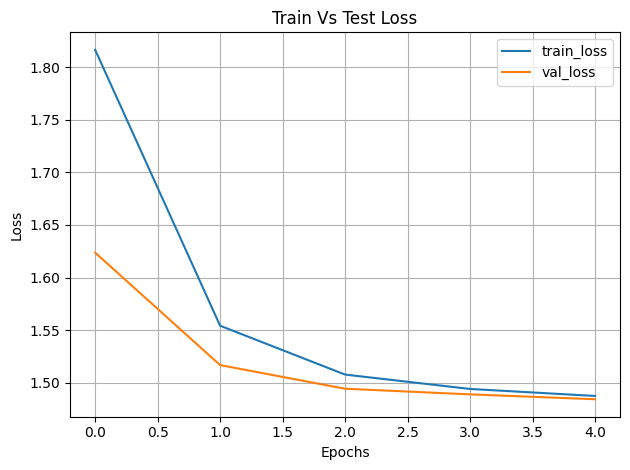

In [29]:
plt.plot(np.array(TRAIN_LOSS), label = 'train_loss')
plt.plot(np.array(VAL_LOSS), label = 'val_loss')
plt.title('Train Vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

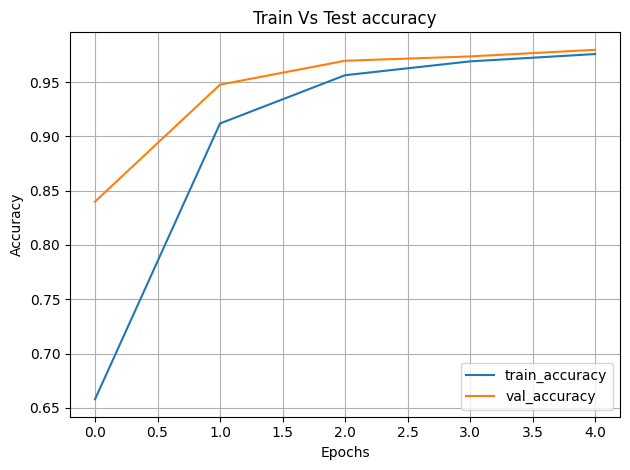

In [30]:
plt.plot(np.array(TRAIN_ACC), label = 'train_accuracy')
plt.plot(np.array(VAL_ACC), label = 'val_accuracy')
plt.title('Train Vs Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#####Evaluation the model performance

In [ ]:
with torch.no_grad():
  predicted = model(X_train)
  predicted = torch.argmax(predicted, 1)

  print("ACCURACY  # {}".format(accuracy_score(y_train, predicted, average = 'macro')),'\n')
  print("PRECISION # {}".format(precision_score(y_train, predicted, average = 'macro')),'\n')
  print("RECALL    # {}".format(recall_score(y_train, predicted, average = 'macro')),'\n')
  print("F1_SCORE  # {}".format(f1_score(y_train, predicted, average = 'macro')))

In [ ]:
with torch.no_grad():
  predicted = model(X_test)
  predicted = torch.argmax(predicted, 1)

  print("ACCURACY  # {}".format(accuracy_score(y_test, predicted, average = 'macro')),'\n')
  print("PRECISION # {}".format(precision_score(y_test, predicted, average = 'macro')),'\n')
  print("RECALL    # {}".format(recall_score(y_test, predicted, average = 'macro')),'\n')
  print("F1_SCORE  # {}".format(f1_score(y_test, predicted, average = 'macro')))